# Exponential Moving Average (EMA) in Python implementieren
**Ziel des Notebooks**: Verstehen und implementieren des EMA anhand der Microsoft Aktie.
Der Exponential Moving Average ist ein gewichteter gleitender Durchschnitt, der neueren Schlusspreisen
einer Aktie stärkeres Gewicht gibt. Er reagiert schneller auf Preisänderungen als der SMA
und ist daher ein beliebter Trendindikator in der technischen Analyse.
Die Formel zum Berechnen des EMA lautet rekursiv:
$$
\text{EMA}_t = \alpha \cdot P_t + (1 - \alpha) \cdot \text{EMA}_{t-1}
$$
- $P_t$ = Schlusspreis am Tag $t$
- $\alpha = \frac{2}{n+1}$ = Glättungsfaktor (für Fenstergröße $n$, z. B. $5$, $20$)
- $\text{EMA}_0 = P_0$ (Startwert ist der erste Preis)

Der erste EMA-Wert ist der erste Schlusspreis. Danach wird rekursiv gerechnet.
Das Notebook ist wie folgt strukturiert:
1. Daten von Microsoft mit yfinance laden
2. EMA_$5$ und EMA_$20$ berechnen
3. Visualisierung mit matplotlib
   
Zunächst importiere ich die notwendigen Bibliotheken:

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

## Daten der Microsoft Aktie ziehen

In diesem Schritt lade ich die historischen Kursdaten von der Aktie mittels der Yahoo Finance API herunter. Ich nutze den Zeitraum des letzten Jahres (period = "1y") mit täglichen Schlusspreisen (interval="1d"). Der Parameter "auto_adjust=False" sorgt dafür, dass ich die rohen Schlusspreise erhalte. Die Daten werden in einem pandas.DataFrame gespeichert. Anschließend lasse ich mir die ersten 25 Einträge der Spalte "Close" anzeigen.

In [14]:
data = yf.download("MSFT", period = "1y", interval = "1d", auto_adjust = "False")
print(data["Close"].head(25))

[*********************100%***********************]  1 of 1 completed

Ticker            MSFT
Date                  
2024-11-15  411.907593
2024-11-18  412.661926
2024-11-19  414.676788
2024-11-20  412.393921
2024-11-21  410.613739
2024-11-22  414.721161
2024-11-25  416.501373
2024-11-26  425.651093
2024-11-27  420.678406
2024-11-29  421.145844
2024-12-02  428.624756
2024-12-03  428.843567
2024-12-04  435.029572
2024-12-05  440.201141
2024-12-06  441.145966
2024-12-09  443.582520
2024-12-10  440.907257
2024-12-11  446.536346
2024-12-12  447.103241
2024-12-13  444.825745
2024-12-16  449.122131
2024-12-17  451.976410
2024-12-18  434.999725
2024-12-19  434.641693
2024-12-20  434.214050


## Berechnen verschiedener EMAs
Die Berechnung erfolgt mit der pandas.ewm(span=n, adjust=False).mean() Funktion.  
Der erste EMA-Wert ist der erste Schlusspreis, da noch keine vorherigen Werte existieren. Das ist normal und gewollt. Im Gegensatz zum SMA entstehen hier keine $NaN$ Werte am Anfang.  
Anschließend lasse ich mir die berechneten Daten ausgeben und füge dem Datensatz 2 Spalten hinzu. Diese sind jeweils die berechneten Werte für den EMA_20 und EMA_5.  
Da das überschriebene Datenset weitere Informationen enthält, filtere ich mit der loc[] Funktion nach den Schlusspreisen sowie den berechneten Durchschnittswerten und zeige die letzten und ersten 15 Werte an.

In [15]:
data["EMA_5"] = data["Close"].ewm(span = 5, adjust = False).mean()
data["EMA_20"] = data["Close"].ewm(span = 20, adjust = False).mean()
print(data.loc[:, ["Close", "EMA_5", "EMA_20"]])

Price            Close       EMA_5      EMA_20
Ticker            MSFT                        
Date                                          
2024-11-15  411.907593  411.907593  411.907593
2024-11-18  412.661926  412.159037  411.979434
2024-11-19  414.676788  412.998288  412.236325
2024-11-20  412.393921  412.796832  412.251334
2024-11-21  410.613739  412.069134  412.095373
...                ...         ...         ...
2025-11-10  506.000000  505.606065  514.757332
2025-11-11  508.679993  506.630708  514.178538
2025-11-12  511.140015  508.133810  513.889154
2025-11-13  503.290009  506.519210  512.879712
2025-11-14  510.179993  507.739471  512.622596

[250 rows x 3 columns]


## Visualisierung

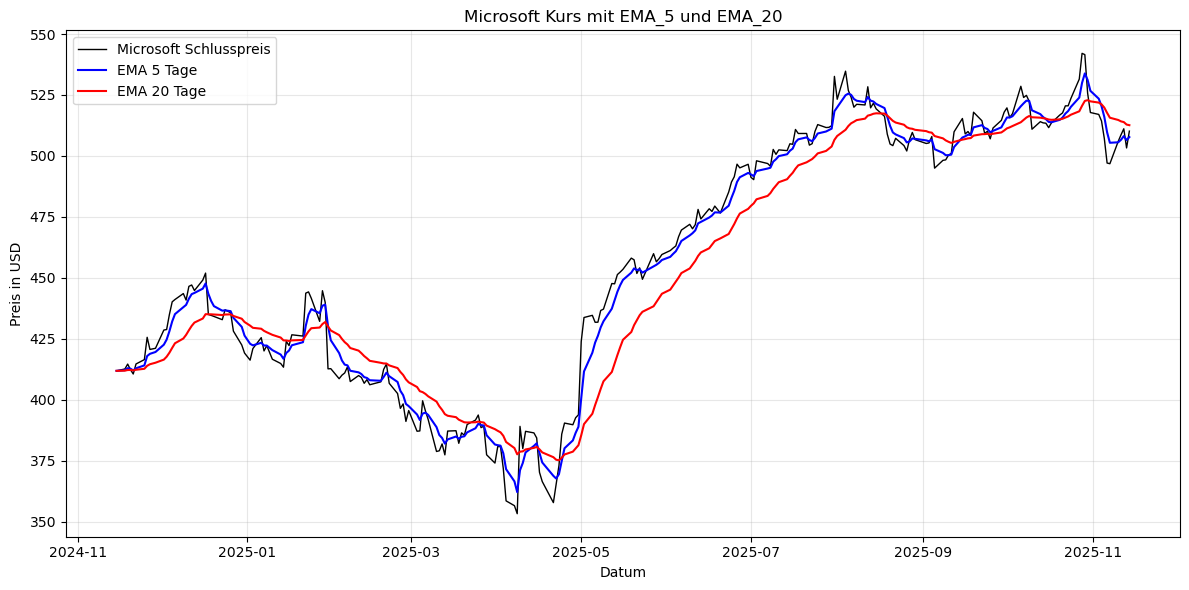

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Microsoft Schlusspreis', color='black', linewidth=1)
plt.plot(data.index, data['EMA_5'], label='EMA 5 Tage', color='blue')
plt.plot(data.index, data['EMA_20'], label='EMA 20 Tage', color='red')
plt.title('Microsoft Kurs mit EMA_5 und EMA_20')
plt.xlabel('Datum')
plt.ylabel('Preis in USD')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()